In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and print first 5 data rows
df = pd.read_csv('..\Data\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#columns and Rows
df.shape

(119390, 32)

In [4]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#summary of statistics of all numerical columns 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
#Prints a list of all column names in the dataset
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [7]:
#Get count of the total number of missing values 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Check for missing values and creates a summary table 
print("Missing Values Summary:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])


Missing Values Summary:
          Missing_Count  Missing_Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350


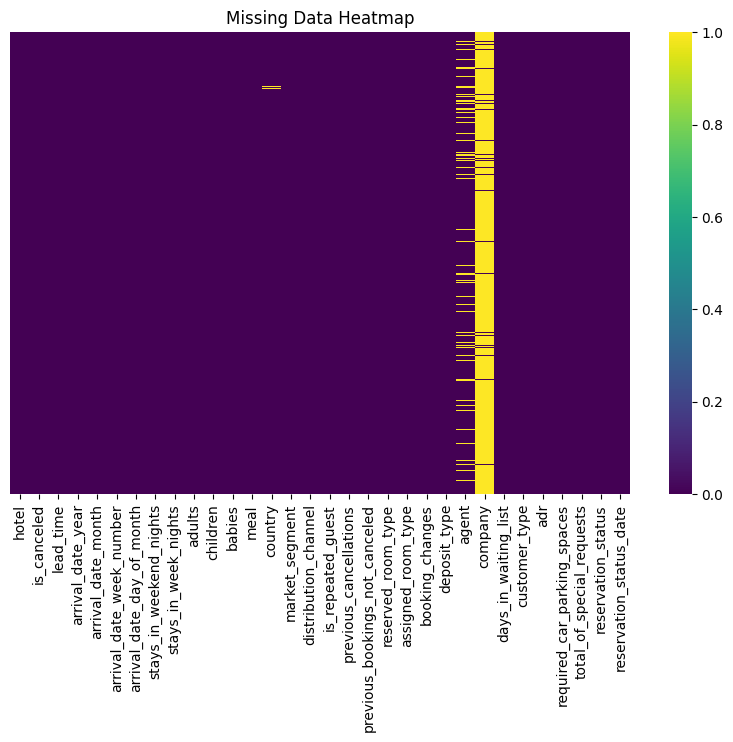

In [9]:
# Visualize missing data patterns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [10]:
# Examine data types
print("\nData Types:")
print(df.dtypes)



Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

In [11]:
# Check for mixed data types in object columns
print("\nObject Columns Analysis:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Sample values: {df[col].dropna().unique()[:5]}")



Object Columns Analysis:

hotel:
  Unique values: 2
  Sample values: ['Resort Hotel' 'City Hotel']

arrival_date_month:
  Unique values: 12
  Sample values: ['July' 'August' 'September' 'October' 'November']

meal:
  Unique values: 5
  Sample values: ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
  Unique values: 177
  Sample values: ['PRT' 'GBR' 'USA' 'ESP' 'IRL']

market_segment:
  Unique values: 8
  Sample values: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary']

distribution_channel:
  Unique values: 5
  Sample values: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type:
  Unique values: 10
  Sample values: ['C' 'A' 'D' 'E' 'G']

assigned_room_type:
  Unique values: 12
  Sample values: ['C' 'A' 'D' 'E' 'G']

deposit_type:
  Unique values: 3
  Sample values: ['No Deposit' 'Refundable' 'Non Refund']

customer_type:
  Unique values: 4
  Sample values: ['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status:
  Unique values: 3
  Sample va

In [12]:
# Check for duplicate records
print(f"\nDuplicate Records: {df.duplicated().sum()}")



Duplicate Records: 31994


In [13]:
#Check for duplicates based on specific columns
columns_to_check = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
                    'arrival_date_month', 'arrival_date_day_of_month',
                    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                    'children', 'babies', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'reserved_room_type',
                    'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
                    'company', 'days_in_waiting_list', 'customer_type', 'adr',
                    'required_car_parking_spaces', 'total_of_special_requests',
                    'reservation_status', 'reservation_status_date']

duplicates_subset = df.duplicated(subset=columns_to_check).sum()

print(f"\nDuplicate Records based on specified columns: {duplicates_subset}")



Duplicate Records based on specified columns: 31994


In [14]:
# Statistical summary for numerical columns

print("\nOutlier Detection (Numerical Columns):")
numerical_cols = df.select_dtypes(include=np.number).columns
print(df[numerical_cols].describe())



Outlier Detection (Numerical Columns):
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%

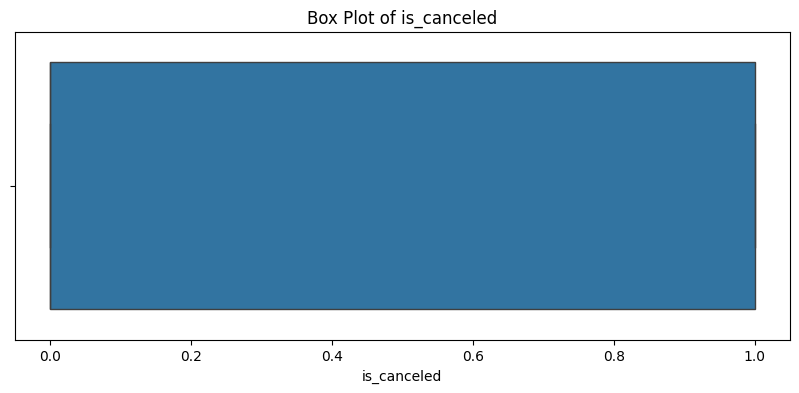

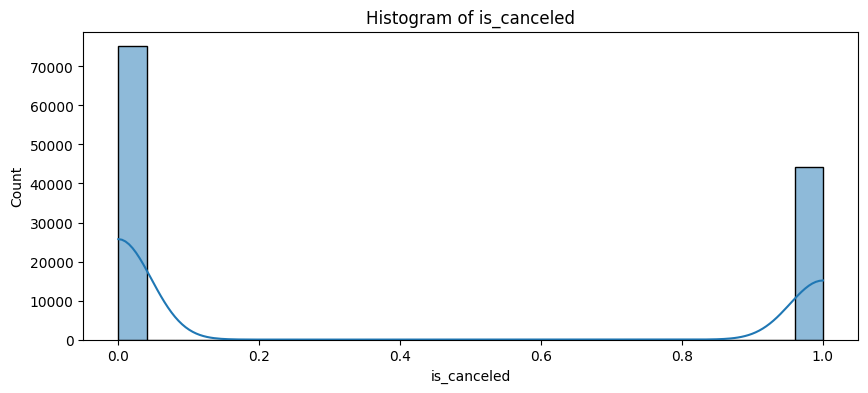

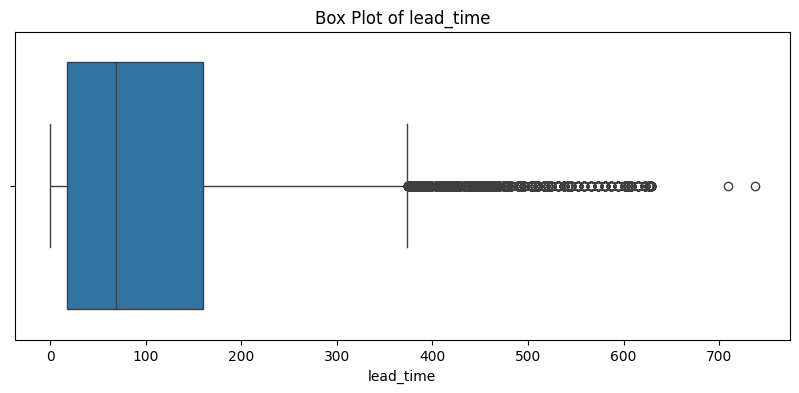

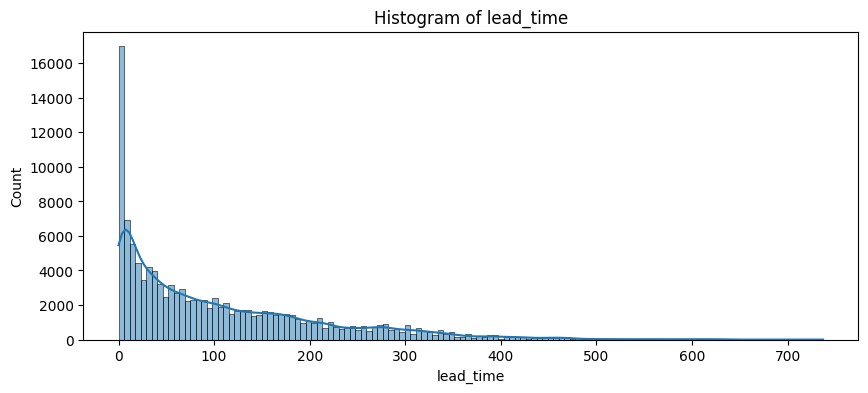

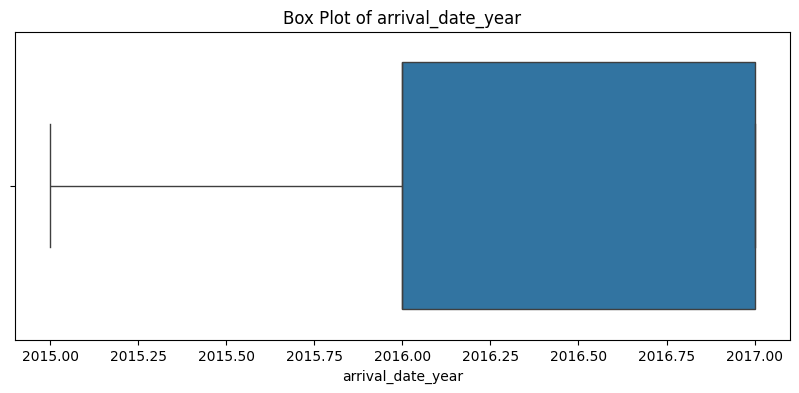

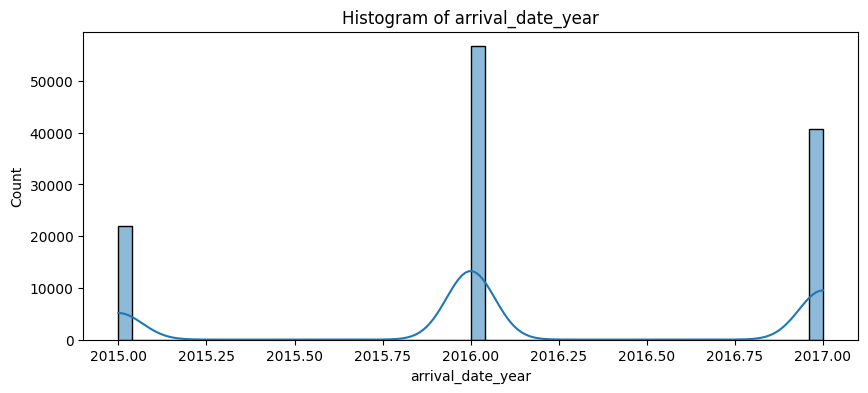

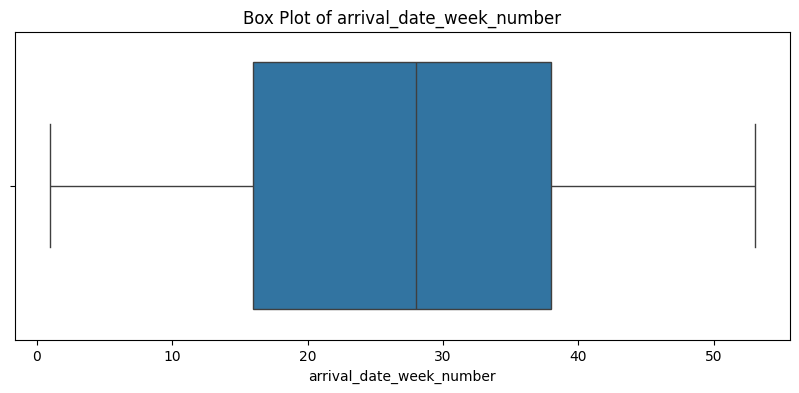

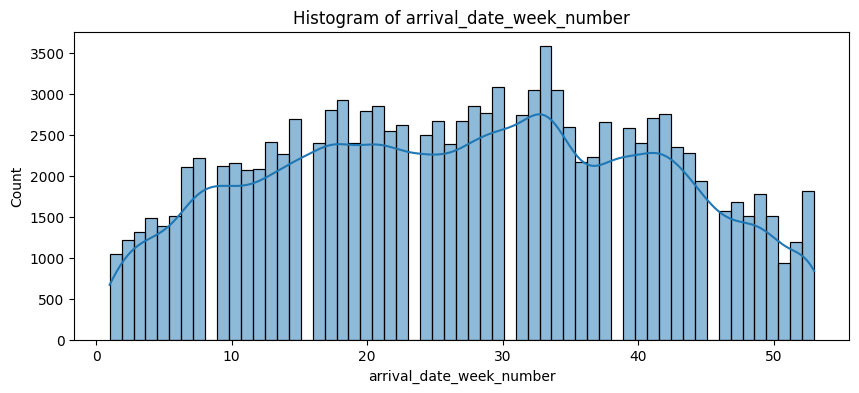

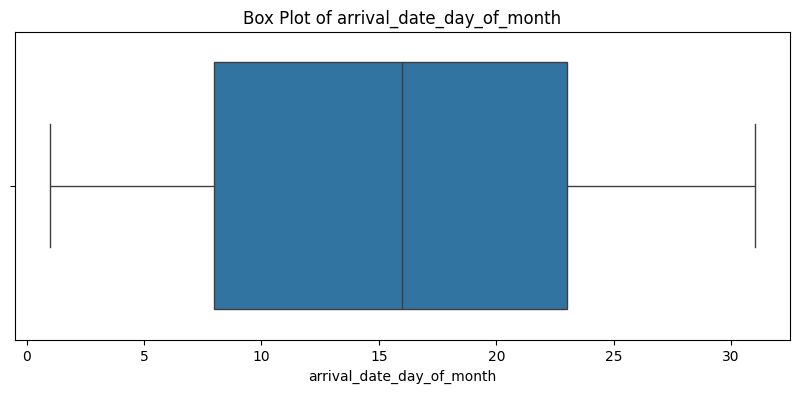

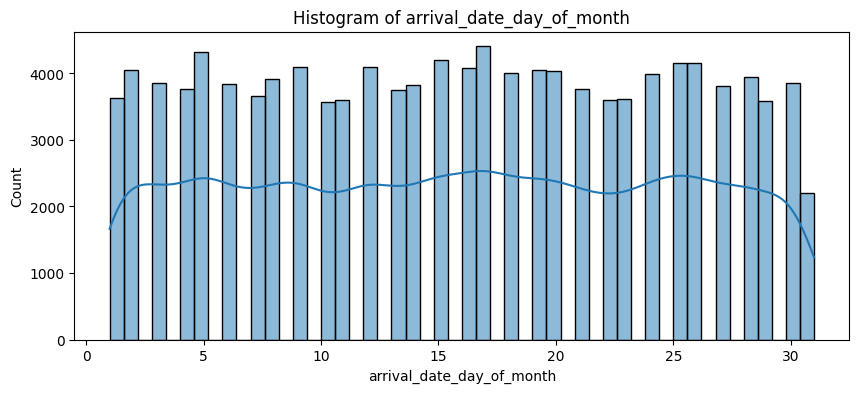

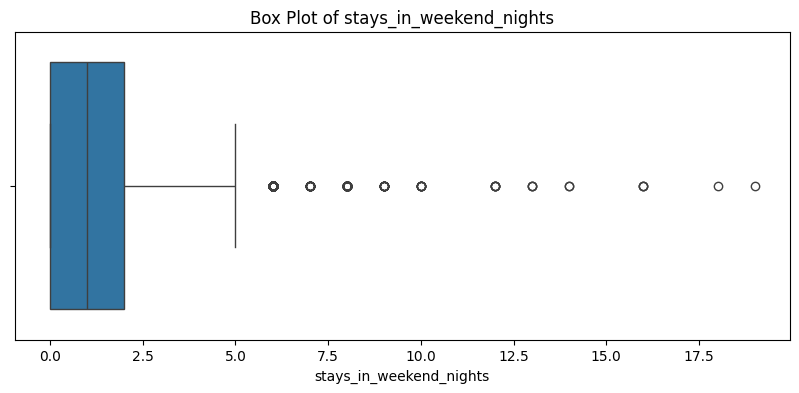

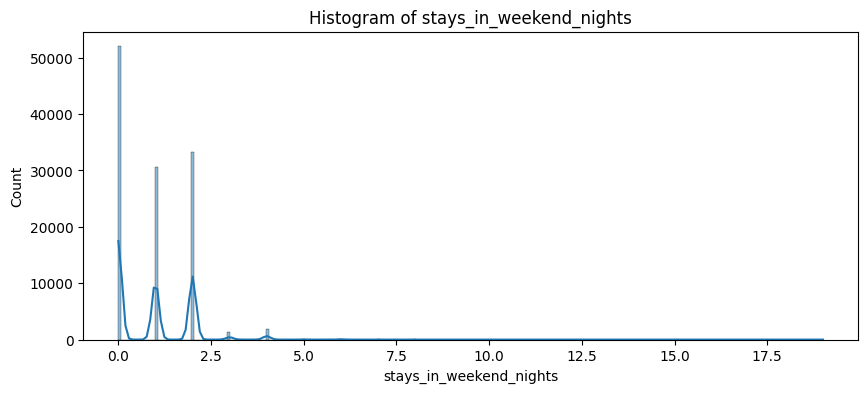

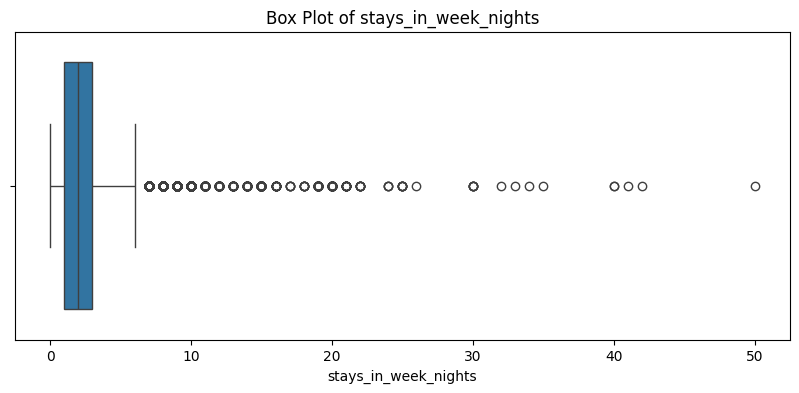

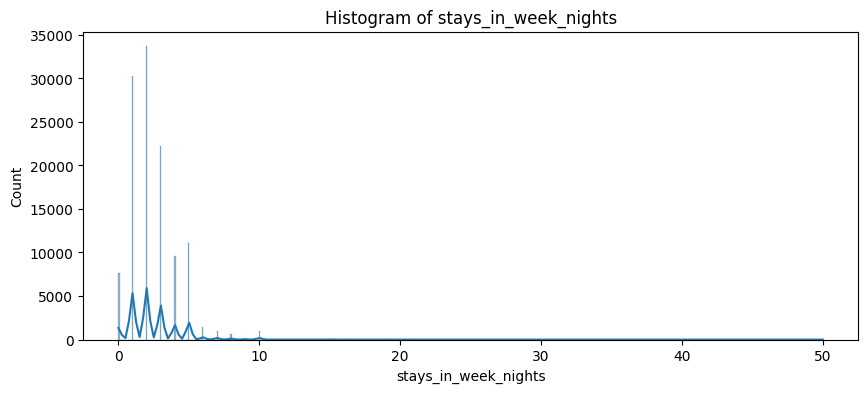

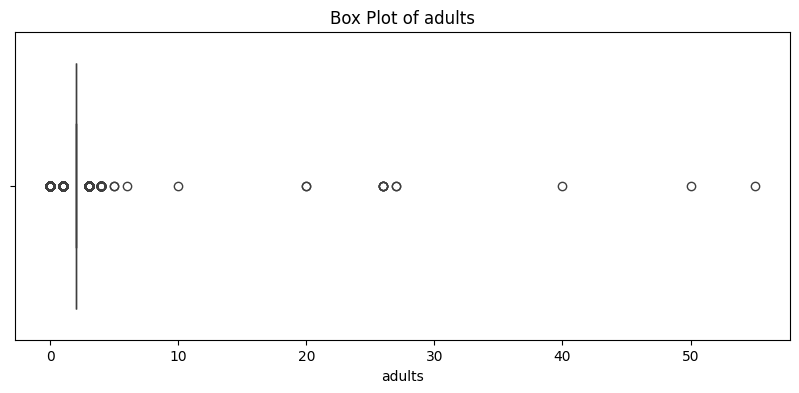

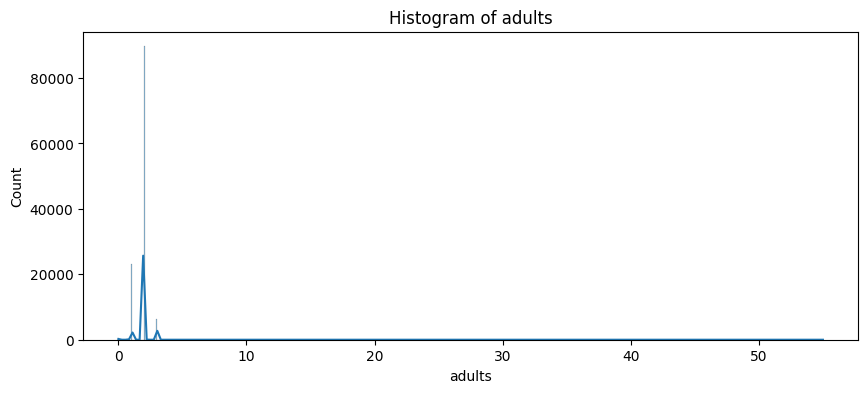

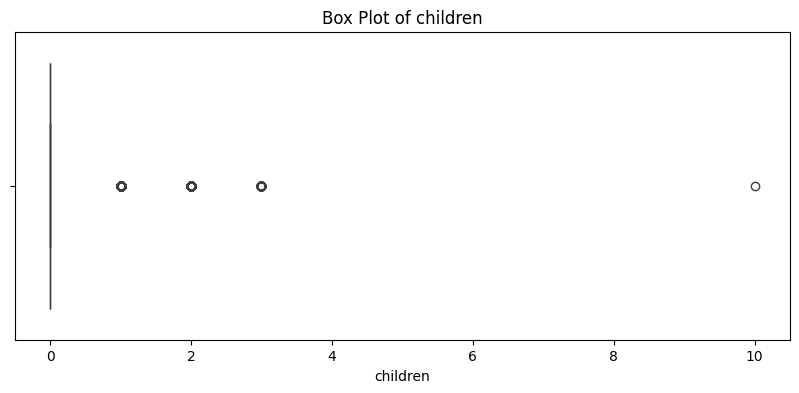

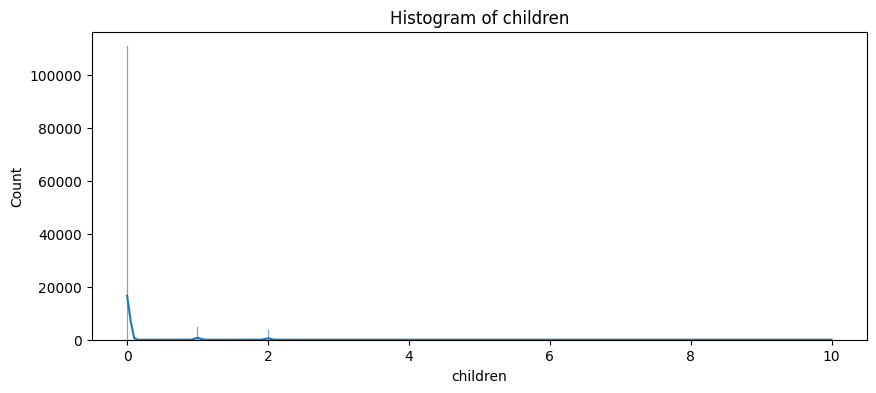

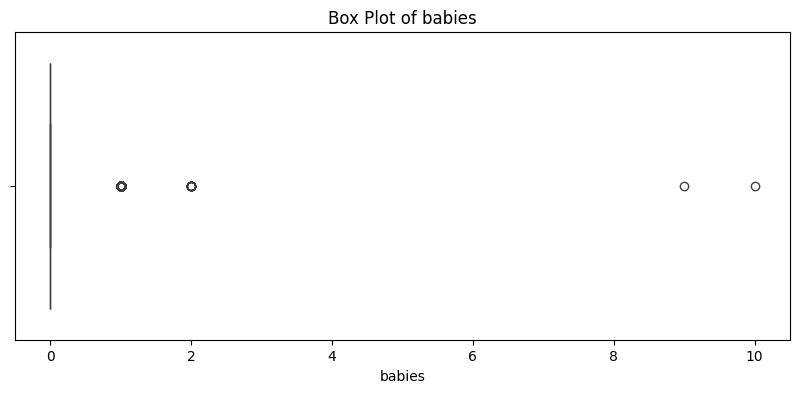

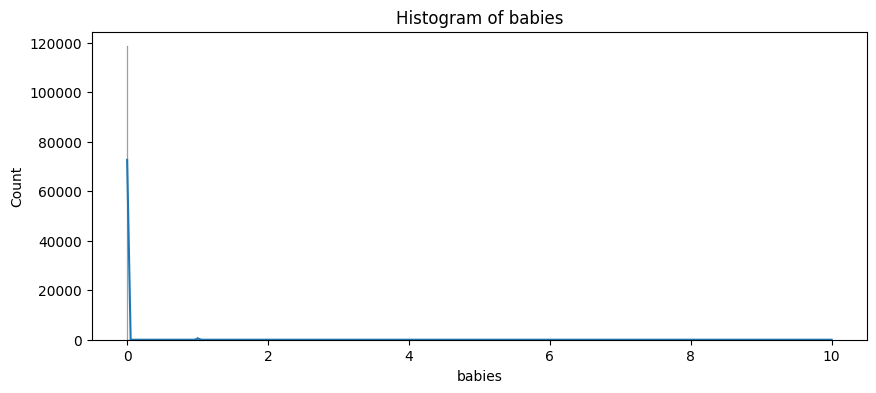

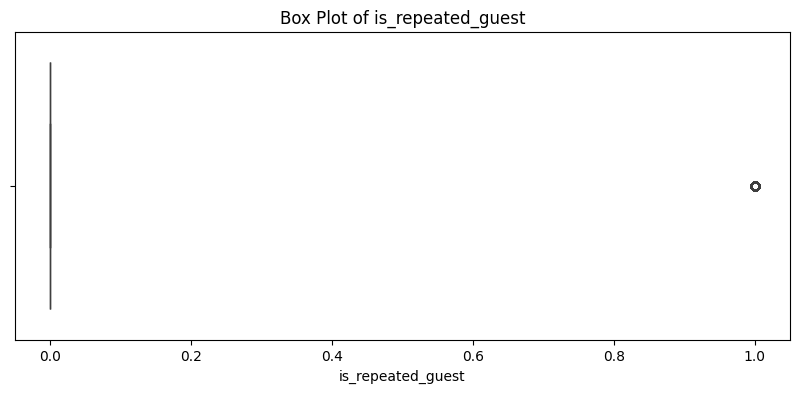

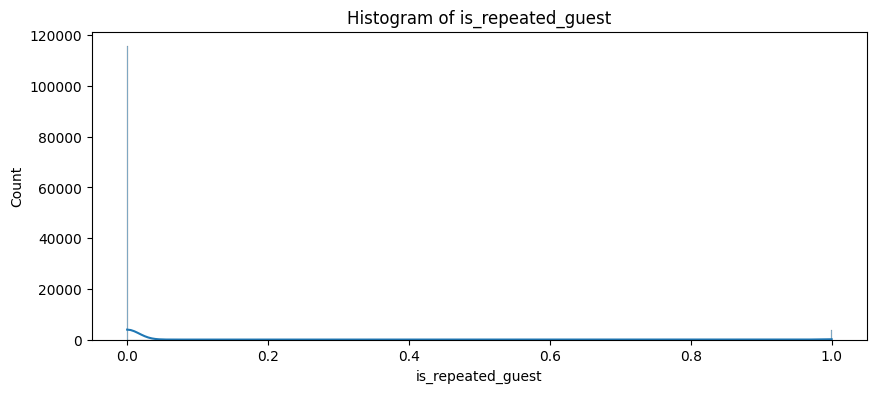

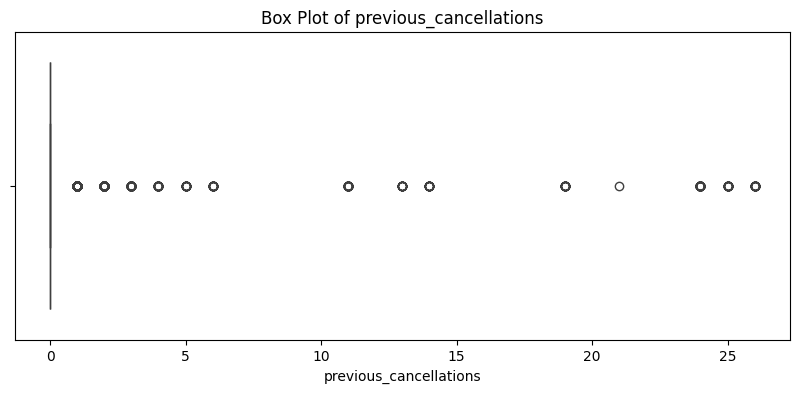

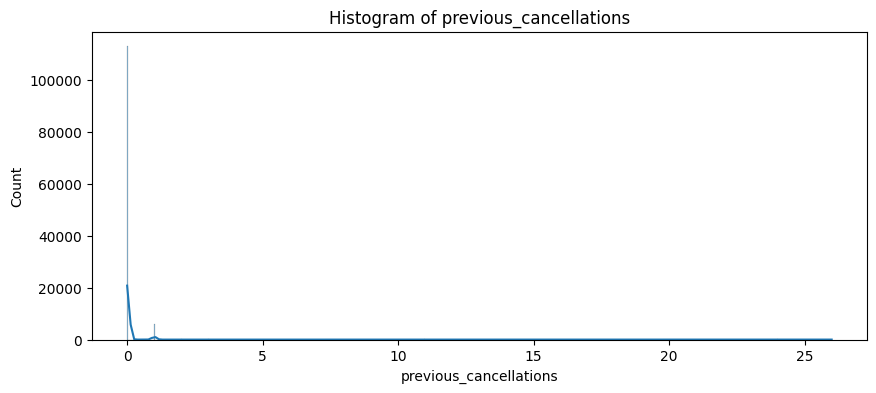

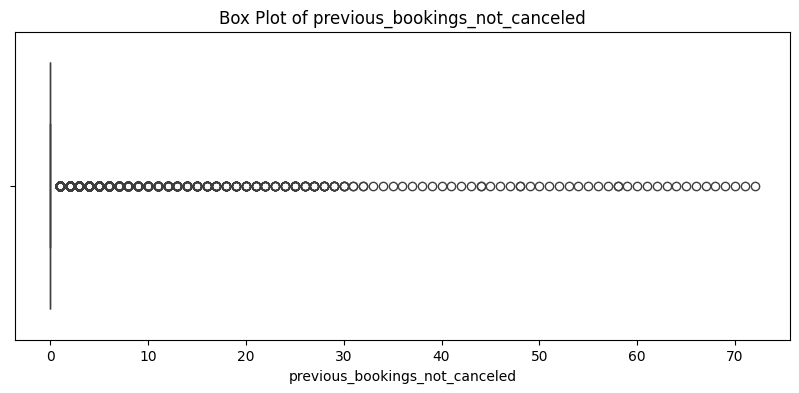

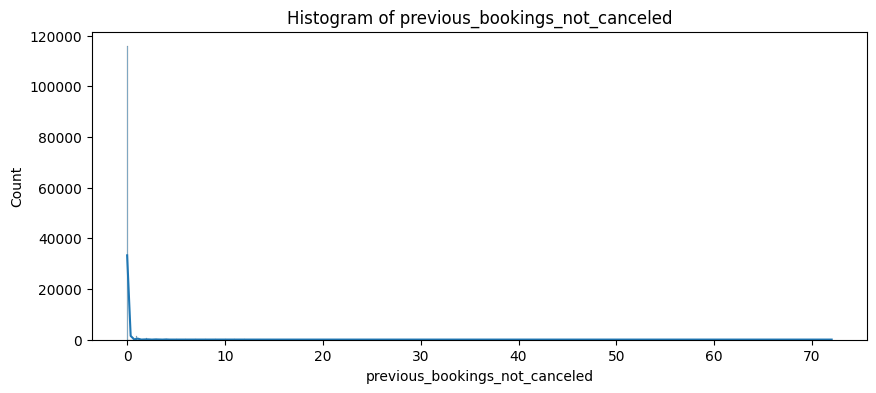

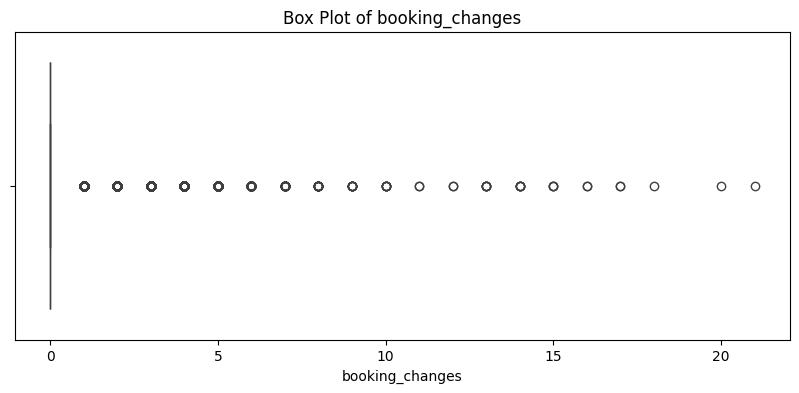

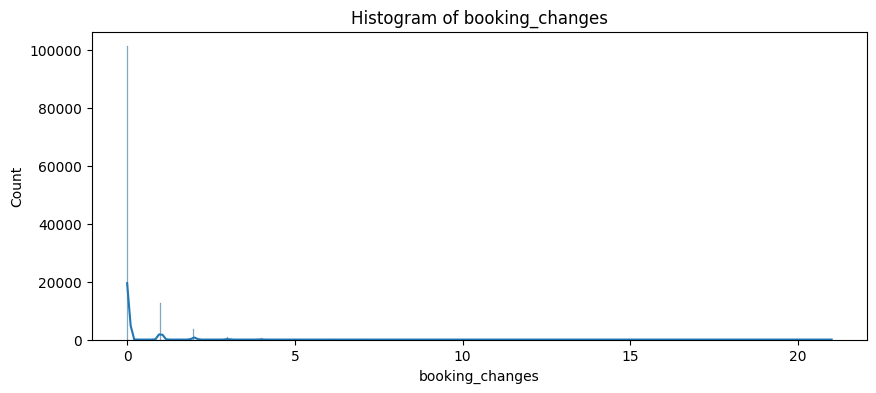

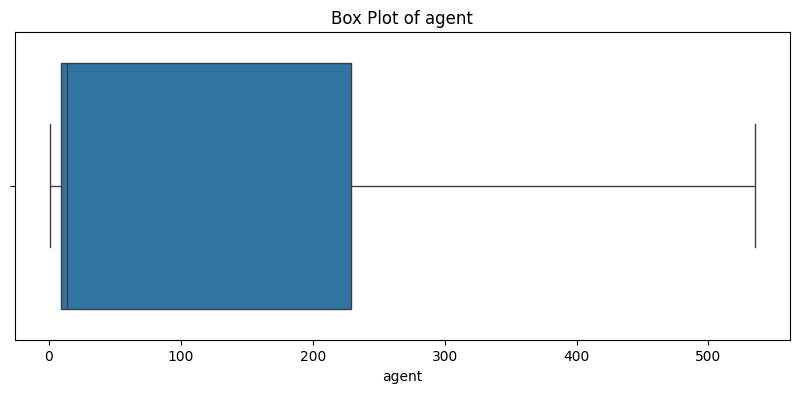

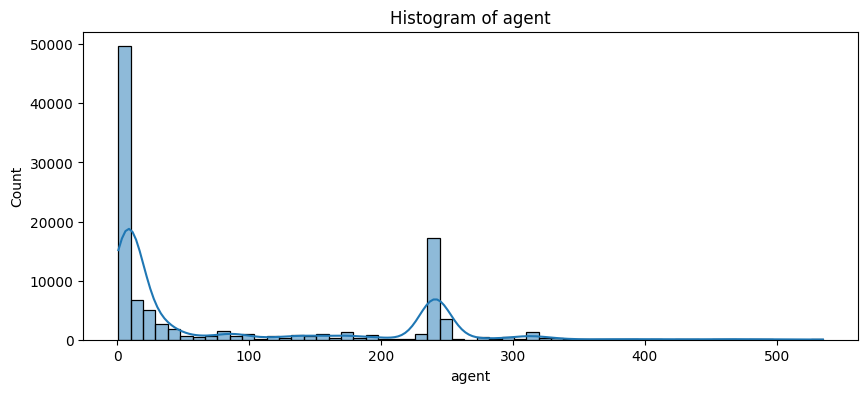

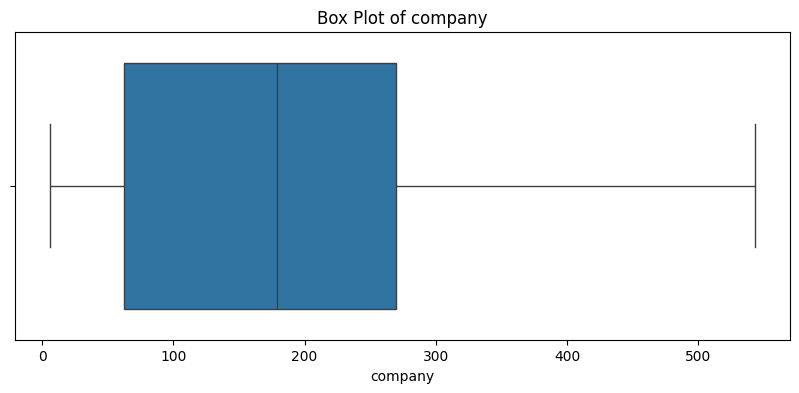

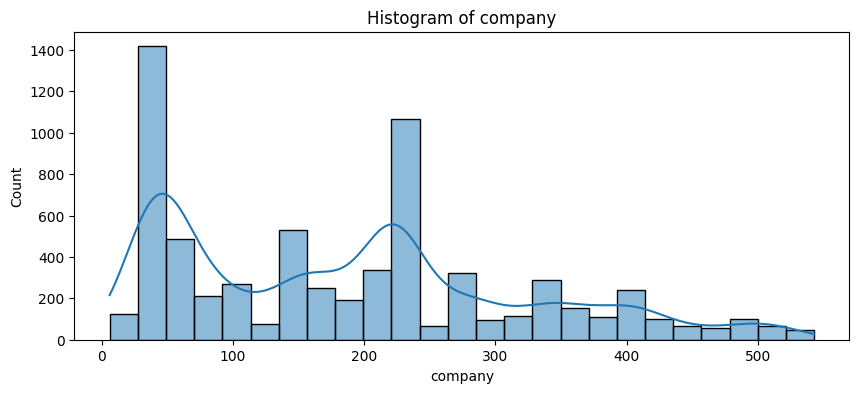

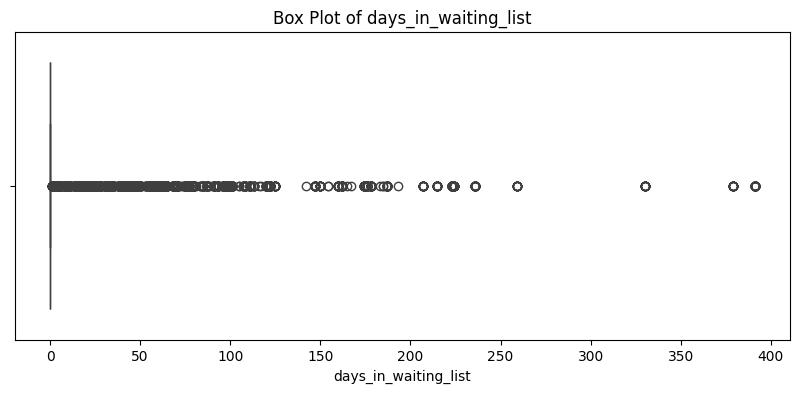

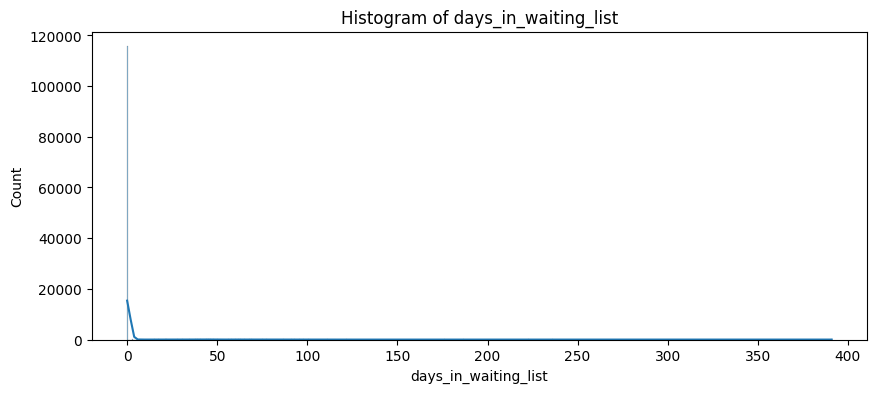

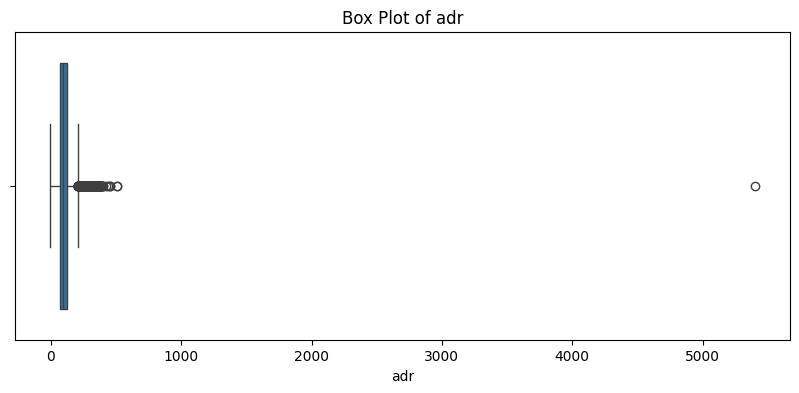

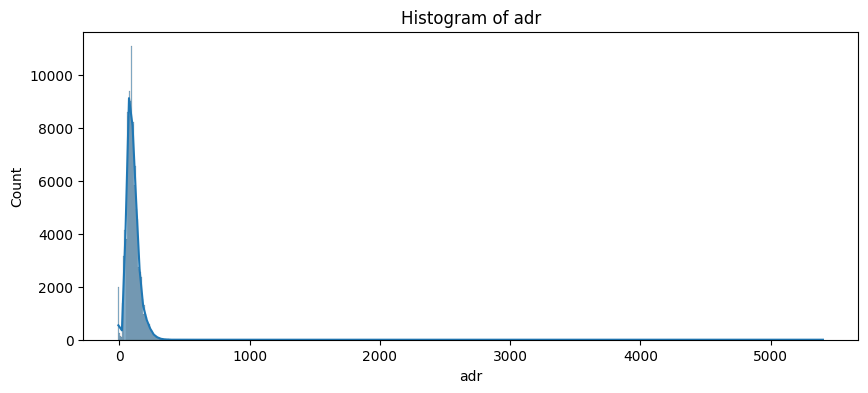

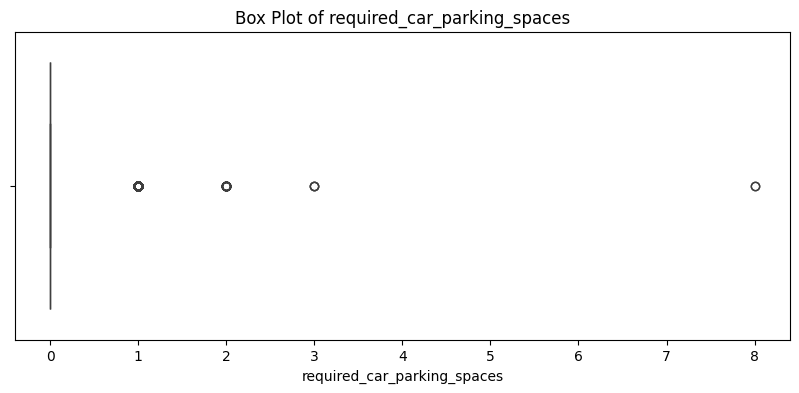

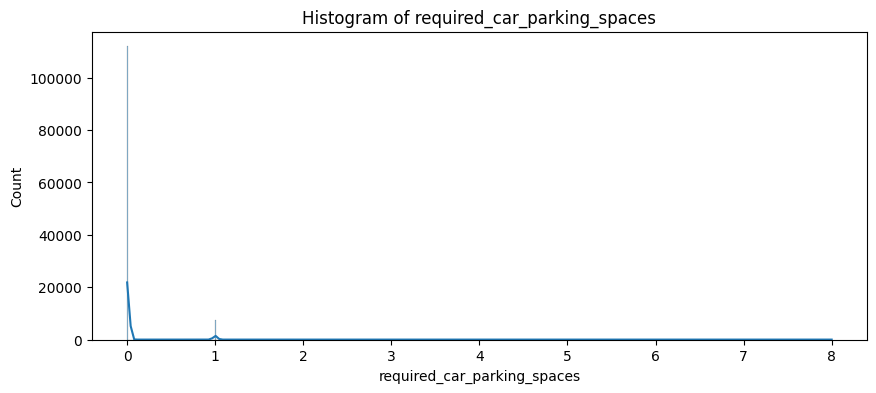

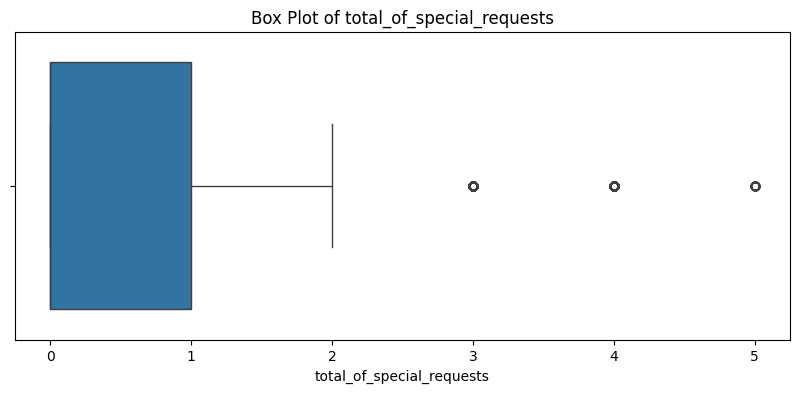

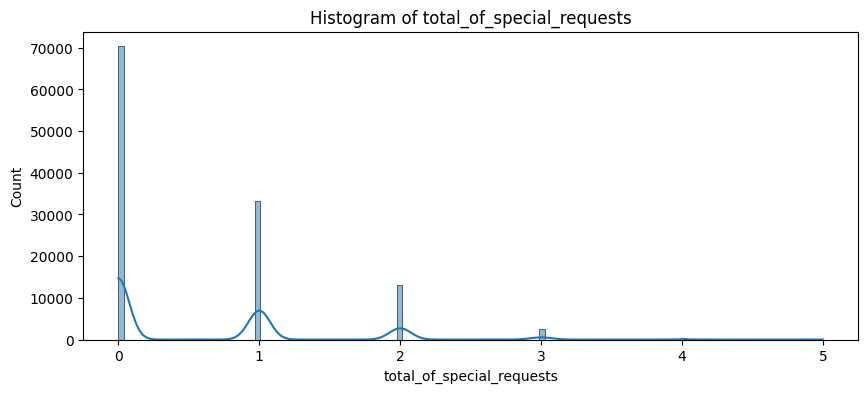

In [15]:
# Visualize distributions (e.g., histograms, box plots) to spot outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



Outliers in 'lead_time' (based on IQR): 3005
      lead_time
1           737
225         394
890         460
1516        381
1672        382

Outliers in 'adr' (based on Z-score > 3): 1138
        adr
803  280.74
925  268.00
936  267.00
943  277.50
973  276.43

Shape after removing extreme 'adr' outliers: (119389, 33)


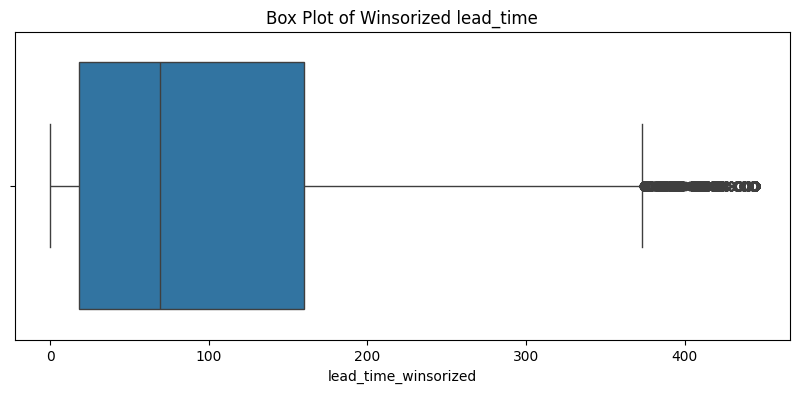

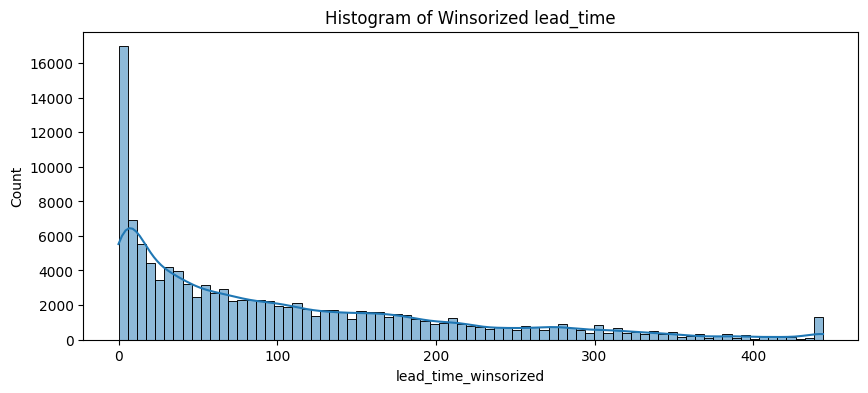

In [16]:
# Identify potential outliers based on IQR or Z-score
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lead_time = df[(df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)]
print(f"\nOutliers in 'lead_time' (based on IQR): {len(outliers_lead_time)}")
print(outliers_lead_time[['lead_time']].head())

# Example using Z-score for 'adr'
df['adr_zscore'] = np.abs(stats.zscore(df['adr']))
outliers_adr_zscore = df[df['adr_zscore'] > 3]
print(f"\nOutliers in 'adr' (based on Z-score > 3): {len(outliers_adr_zscore)}")
print(outliers_adr_zscore[['adr']].head())

df_cleaned_adr = df[df['adr'] < 5000].copy()
print(f"\nShape after removing extreme 'adr' outliers: {df_cleaned_adr.shape}")

# Example of winsorizing 'lead_time'
from scipy.stats.mstats import winsorize
df['lead_time_winsorized'] = winsorize(df['lead_time'], limits=[0.01, 0.01])

# Visualize the winsorized data
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['lead_time_winsorized'])
plt.title(f'Box Plot of Winsorized lead_time')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['lead_time_winsorized'].dropna(), kde=True)
plt.title(f'Histogram of Winsorized lead_time')
plt.show()


In [17]:
# Analyze categorical columns for inconsistencies
print("\nCategorical Data Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col} - Unique Values ({df[col].nunique()}):")
    value_counts = df[col].value_counts()
    print(value_counts)

    # Check for potential inconsistencies (case sensitivity, extra spaces)
    unique_values = df[col].dropna().unique()
    print(f"  Potential issues: {[val for val in unique_values if ' ' in str(val) or str(val) != str(val).strip()]}")



Categorical Data Analysis:

hotel - Unique Values (2):
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
  Potential issues: ['Resort Hotel', 'City Hotel']

arrival_date_month - Unique Values (12):
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
  Potential issues: []

meal - Unique Values (5):
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
  Potential issues: []

country - Unique Values (177):
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64
  Potential issues: []

market_segment - Unique Values (8):
market_segment
Online

In [18]:
# Analyze missing data patterns
def analyze_missing_patterns(df):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Data Summary:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation:")
    missing_corr = df.isnull().corr()
    print(missing_corr.stack()[missing_corr.abs().stack() > 0.1])

    return missing_table

missing_summary = analyze_missing_patterns(df)

Missing Data Summary:
          Missing_Count  Missing_Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350

Missing Data Correlation:
children  children    1.000000
country   country     1.000000
          agent       0.102063
agent     country     0.102063
          agent       1.000000
          company    -0.594200
company   agent      -0.594200
          company     1.000000
dtype: float64


In [19]:
# Define subset of key columns for similarity
key_columns = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 
               'lead_time', 'adults', 'children', 'babies', 'customer_type']

# Find near-duplicates (drop ID columns or dates)
near_duplicates = df[df.duplicated(subset=key_columns, keep=False)]

print(f"Near-duplicate rows found: {len(near_duplicates)}")
near_duplicates.head()
# Visualize near-duplicates
plt.figure(figsize=(12, 6))

Near-duplicate rows found: 70321


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [20]:
def detect_iqr_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Detect for selected columns
outlier_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                   'adults', 'children', 'babies', 'adr']

for col in outlier_columns:
    outliers = detect_iqr_outliers(col)
    print(f"{col}: {len(outliers)} outliers")


lead_time: 3005 outliers
stays_in_weekend_nights: 265 outliers
stays_in_week_nights: 3354 outliers
adults: 29710 outliers
children: 8590 outliers
babies: 917 outliers
adr: 3793 outliers


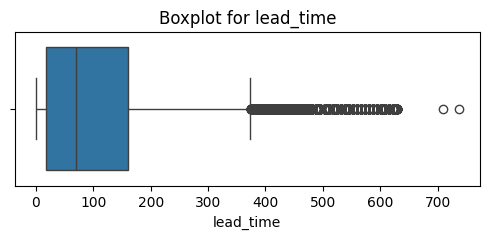

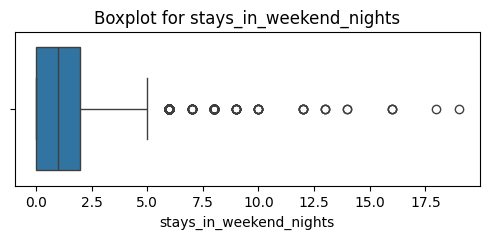

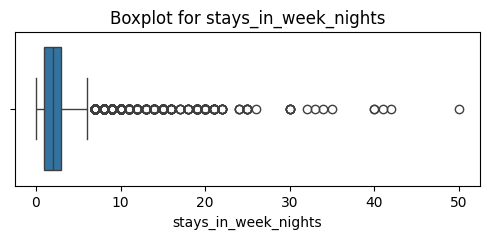

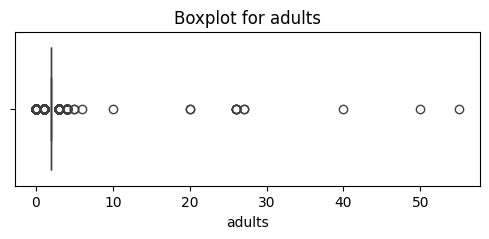

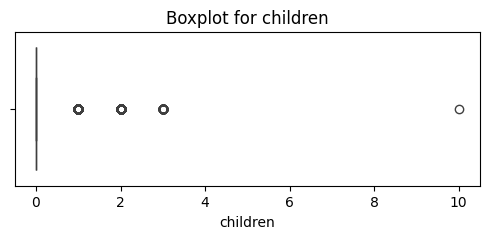

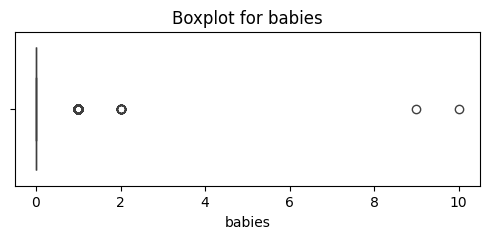

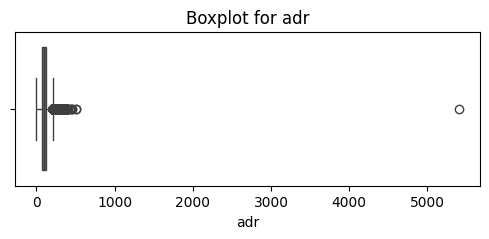

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in outlier_columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [22]:
# Standardize country codes to uppercase
df['country'] = df['country'].str.upper()

# Fix invalid guest count (adults + children + babies = 0)
invalid_guests = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
print(f"Invalid guest rows: {len(invalid_guests)}")

# Option: remove or set adults to 1
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# Check date range
arrival_date = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                              df['arrival_date_month'] + '-' +
                              df['arrival_date_day_of_month'].astype(str), errors='coerce')
print(f"Arrival date range: {arrival_date.min()} to {arrival_date.max()}")


Invalid guest rows: 180
Arrival date range: 2015-07-01 00:00:00 to 2017-08-31 00:00:00


In [23]:
# Validate total guests > 0
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print("Guests ≤ 0:", df[df['total_guests'] <= 0].shape[0])

# Validate ADR and lead_time are non-negative
print("Negative ADR:", df[df['adr'] < 0].shape[0])
print("Negative lead_time:", df[df['lead_time'] < 0].shape[0])

# Validate expected categories
print("Meal categories:", df['meal'].unique())
print("Customer types:", df['customer_type'].unique())


Guests ≤ 0: 0
Negative ADR: 1
Negative lead_time: 0
Meal categories: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Customer types: ['Transient' 'Contract' 'Transient-Party' 'Group']


In [24]:
#columns and Rows After cleaned
df.shape

(119210, 35)

In [25]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)
